Sure! Let's modify the above instructions to work in a Jupyter Notebook environment. The process will still involve image classification using a Vision Transformer (ViT) model, but we’ll streamline it for use within Jupyter and provide steps for creating a Docker container and deploying it on Kubernetes.

### Step 1: Set Up Your Jupyter Notebook

First, open a Jupyter Notebook and create a new notebook for your image classification project.

### Step 2: Install Required Libraries

In a Jupyter Notebook cell, run the following commands to install the necessary libraries:

```python
!pip install torch torchvision transformers Pillow
```

### Step 3: Create Image Classification Code

In the next cell, write the code for image classification using ViT.

```python
import torch
from PIL import Image
from transformers import ViTForImageClassification, ViTImageProcessor

# Load the pre-trained ViT model and processor
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")

# Function to predict the class of an image
def classify_image(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_class_idx = logits.argmax(-1).item()
    return predicted_class_idx
```

### Step 4: Test the Classification Function

You can test the classification function with a sample image. Place a sample image in the same directory as your notebook, or provide the path to an image.

```python
# Test the classify_image function
image_path = "sample_image.jpg"  # Replace with your image path
class_idx = classify_image(image_path)
print(f"Predicted class index: {class_idx}")
```

### Step 5: Prepare for Dockerization

Next, we’ll create the necessary files for Dockerization directly from the notebook.

#### Create `requirements.txt`

```python
with open('requirements.txt', 'w') as f:
    f.write("torch==1.12.1\n")
    f.write("transformers==4.20.1\n")
    f.write("Pillow==9.1.0\n")
```

#### Create `Dockerfile`

```python
dockerfile_content = """\
# Dockerfile
FROM python:3.9-slim

WORKDIR /app

COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

COPY app.py .

ENTRYPOINT ["python", "app.py"]
"""

with open('Dockerfile', 'w') as f:
    f.write(dockerfile_content)
```

#### Create `app.py`

```python
app_code = """\
# app.py
import torch
from PIL import Image
from transformers import ViTForImageClassification, ViTImageProcessor
import sys

model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")

def classify_image(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_class_idx = logits.argmax(-1).item()
    return predicted_class_idx

if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Usage: python app.py <image_path>")
        sys.exit(1)
    image_path = sys.argv[1]
    class_idx = classify_image(image_path)
    print(f"Predicted class index: {class_idx}")
"""

with open('app.py', 'w') as f:
    f.write(app_code)
```

### Step 6: Build the Docker Image

In a terminal (not in the notebook), navigate to the directory containing your notebook and run:

```bash
docker build -t image-classifier .
```

### Step 7: Run the Docker Container

You can test the Docker container by running it with an image:

```bash
docker run --rm -v $(pwd):/app image-classifier /app/sample_image.jpg
```

### Step 8: Create Kubernetes Deployment

Next, create a Kubernetes deployment configuration in the notebook.

```python
k8s_deployment = """\
apiVersion: apps/v1
kind: Deployment
metadata:
  name: image-classifier
spec:
  replicas: 2
  selector:
    matchLabels:
      app: image-classifier
  template:
    metadata:
      labels:
        app: image-classifier
    spec:
      containers:
      - name: image-classifier
        image: your-dockerhub-username/image-classifier:latest
        command: ["python", "app.py", "/path/to/image.jpg"]
"""

with open('k8s-deployment.yaml', 'w') as f:
    f.write(k8s_deployment)
```

### Step 9: Deploy to Kubernetes

Before deploying, push your Docker image to a container registry:

1. **Tag and Push the Image**:

```bash
docker tag image-classifier your-dockerhub-username/image-classifier:latest
docker push your-dockerhub-username/image-classifier:latest
```

2. **Deploy to Kubernetes**:

```bash
kubectl apply -f k8s-deployment.yaml
```

### Step 10: Expose Your Application

Create a service to expose your deployment.

```yaml
apiVersion: v1
kind: Service
metadata:
  name: image-classifier
spec:
  selector:
    app: image-classifier
  ports:
  - protocol: TCP
    port: 80
    targetPort: 8080
  type: LoadBalancer
```

Save this in a file named `k8s-service.yaml` and apply it:

```bash
kubectl apply -f k8s-service.yaml
```

### Step 11: Access Your Application

You can now send requests to your service endpoint (LoadBalancer IP or NodePort) to classify images. For a more interactive usage, you might want to build an API using Flask or FastAPI.

### Summary

1. **Set up a Jupyter Notebook** for image classification using ViT.
2. **Installed necessary libraries**.
3. **Wrote code** for image classification.
4. **Created configuration files** (`requirements.txt`, `Dockerfile`, `app.py`, `k8s-deployment.yaml`, and `k8s-service.yaml`) directly from the notebook.
5. **Built a Docker image** and ran it.
6. **Deployed the container** to Kubernetes and exposed it via a service.

Feel free to adapt the code and deployment configurations to better suit your needs!

## Step 2: Install Required Libraries
* In a Jupyter Notebook cell, run the following commands to install the necessary libraries:

In [1]:
!pip install torch torchvision transformers Pillow


### Step 3: Create Image Classification Code
* In the next cell, write the code for image classification using ViT.

In [3]:
import torch
from PIL import Image
from transformers import ViTForImageClassification, ViTImageProcessor

# Load the pre-trained ViT model and processor
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")

# Function to predict the class of an image
def classify_image(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_class_idx = logits.argmax(-1).item()
    return predicted_class_idx


2024-09-26 16:00:23.138269: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-26 16:00:23.270476: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-26 16:00:24.231209: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-26 16:00:25.136736: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `res

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

### Step 4: Test the Classification Function
* You can test the classification function with a sample image. Place a sample image in the same directory as your notebook, or provide the path to an image.

In [10]:
# Test the classify_image function
image_path = "Images/dog.4124.jpg"  # Replace with your image path
 # Replace with your image path
class_idx = classify_image(image_path)
print(f"Predicted class index: {class_idx}")


Predicted class index: (235, 'German shepherd, German shepherd dog, German police dog, alsatian', <PIL.Image.Image image mode=RGB size=263x499 at 0x7F2B9DA01DF0>)


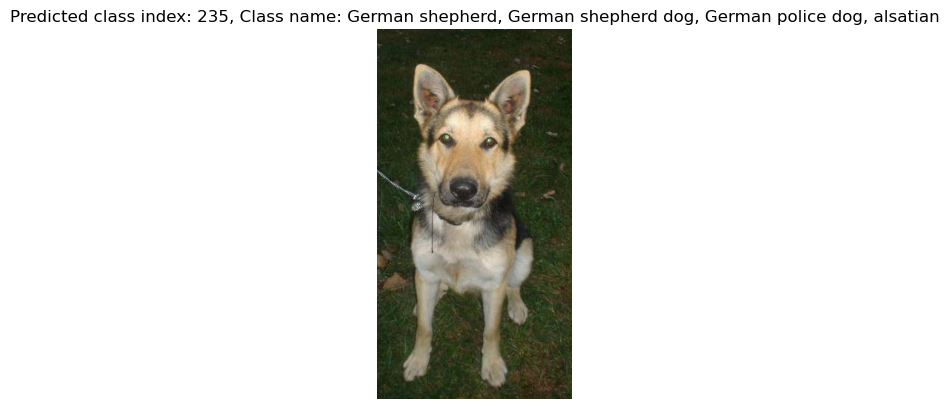

In [8]:
import torch
from PIL import Image
from transformers import ViTForImageClassification, ViTImageProcessor
import matplotlib.pyplot as plt

# Load the pre-trained ViT model and processor
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")

# Load class labels
class_labels = model.config.id2label

# Function to predict the class of an image
def classify_image(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_class_idx = logits.argmax(-1).item()
    predicted_class_name = class_labels[predicted_class_idx]
    
    return predicted_class_idx, predicted_class_name, image

# Test the classify_image function
image_path = "Images/dog.4124.jpg"  # Replace with your image path
class_idx, class_name, image = classify_image(image_path)

# Display the image and prediction results
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title(f"Predicted class index: {class_idx}, Class name: {class_name}")
plt.show()


### Step 5: Prepare for Dockerization
* Next, we’ll create the necessary files for Dockerization directly from the notebook.

* Create requirements.txt

In [11]:
with open('requirements.txt', 'w') as f:
    f.write("torch==1.12.1\n")
    f.write("transformers==4.20.1\n")
    f.write("Pillow==9.1.0\n")


## Create Dockerfile


In [12]:
dockerfile_content = """\
# Dockerfile
FROM python:3.9-slim

WORKDIR /app

COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

COPY app.py .

ENTRYPOINT ["python", "app.py"]
"""

with open('Dockerfile', 'w') as f:
    f.write(dockerfile_content)


In [13]:
app_code = """\
# app.py
import torch
from PIL import Image
from transformers import ViTForImageClassification, ViTImageProcessor
import sys

model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")

def classify_image(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_class_idx = logits.argmax(-1).item()
    return predicted_class_idx

if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Usage: python app.py <image_path>")
        sys.exit(1)
    image_path = sys.argv[1]
    class_idx = classify_image(image_path)
    print(f"Predicted class index: {class_idx}")
"""

with open('app.py', 'w') as f:
    f.write(app_code)


##Step 6: Build the Docker Image
* In a terminal (not in the notebook), navigate to the directory containing your notebook and run:

docker build -t image-classifier .
